In [123]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import random

## Test Data:

label
0    101
3     90
2     90
1     90
Name: count, dtype: int64


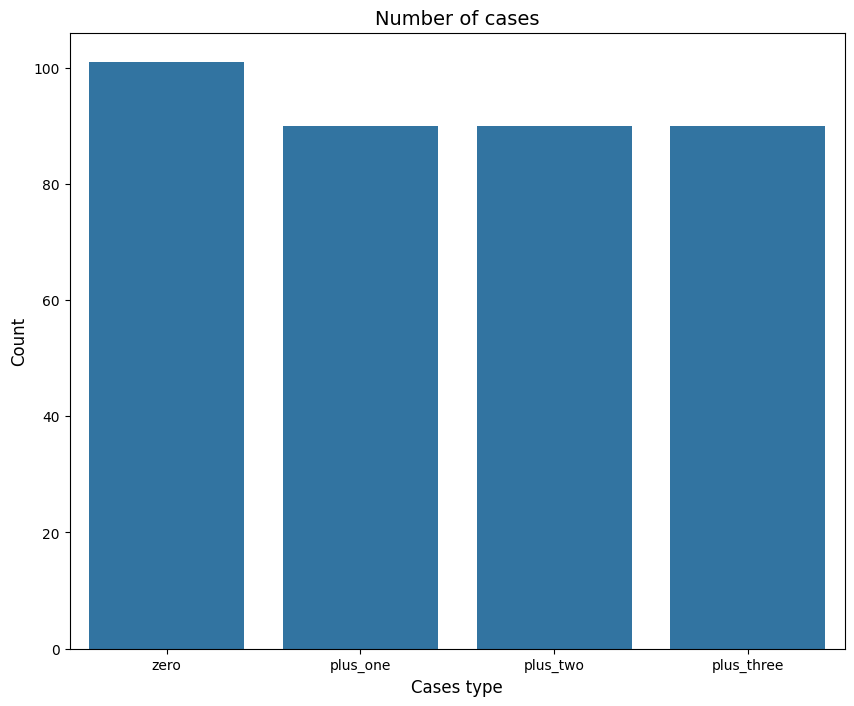

In [4]:
dirPath = 'Test_4cl_amostra'
zero_dir = dirPath + '/0/'
plus_one_dir = dirPath + '/1/'
plus_two_dir = dirPath + '/2/'
plus_three_dir = dirPath + '/3/'


zero_class = glob.glob(zero_dir + '*.png')
plus_one_class = glob.glob(plus_one_dir + '*.png')
plus_two_class = glob.glob(plus_two_dir + '*.png')
plus_three_class = glob.glob(plus_three_dir + '*.png')

data1 = []

for img in zero_class:
    data1.append((img, 0))
    
for img in plus_one_class:
    data1.append((img, 1))
    
for img in plus_two_class:
    data1.append((img, 2))
    
for img in plus_three_class:
    data1.append((img, 3))
    

data1 = pd.DataFrame(data1, columns=['image', 'label'], index=None)

# Shuffle the data    
data1 = data1.sample(frac=1).reset_index(drop=True)


cases_count = data1['label'].value_counts()
print(cases_count)


plt.figure(figsize=(10, 8))
sns.barplot(x=cases_count.index, y=cases_count.values)
plt.title('Number of cases', fontsize=14)
plt.xlabel('Cases type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(len(cases_count.index)), ['zero', 'plus_one', 'plus_two', 'plus_three'])
plt.show()

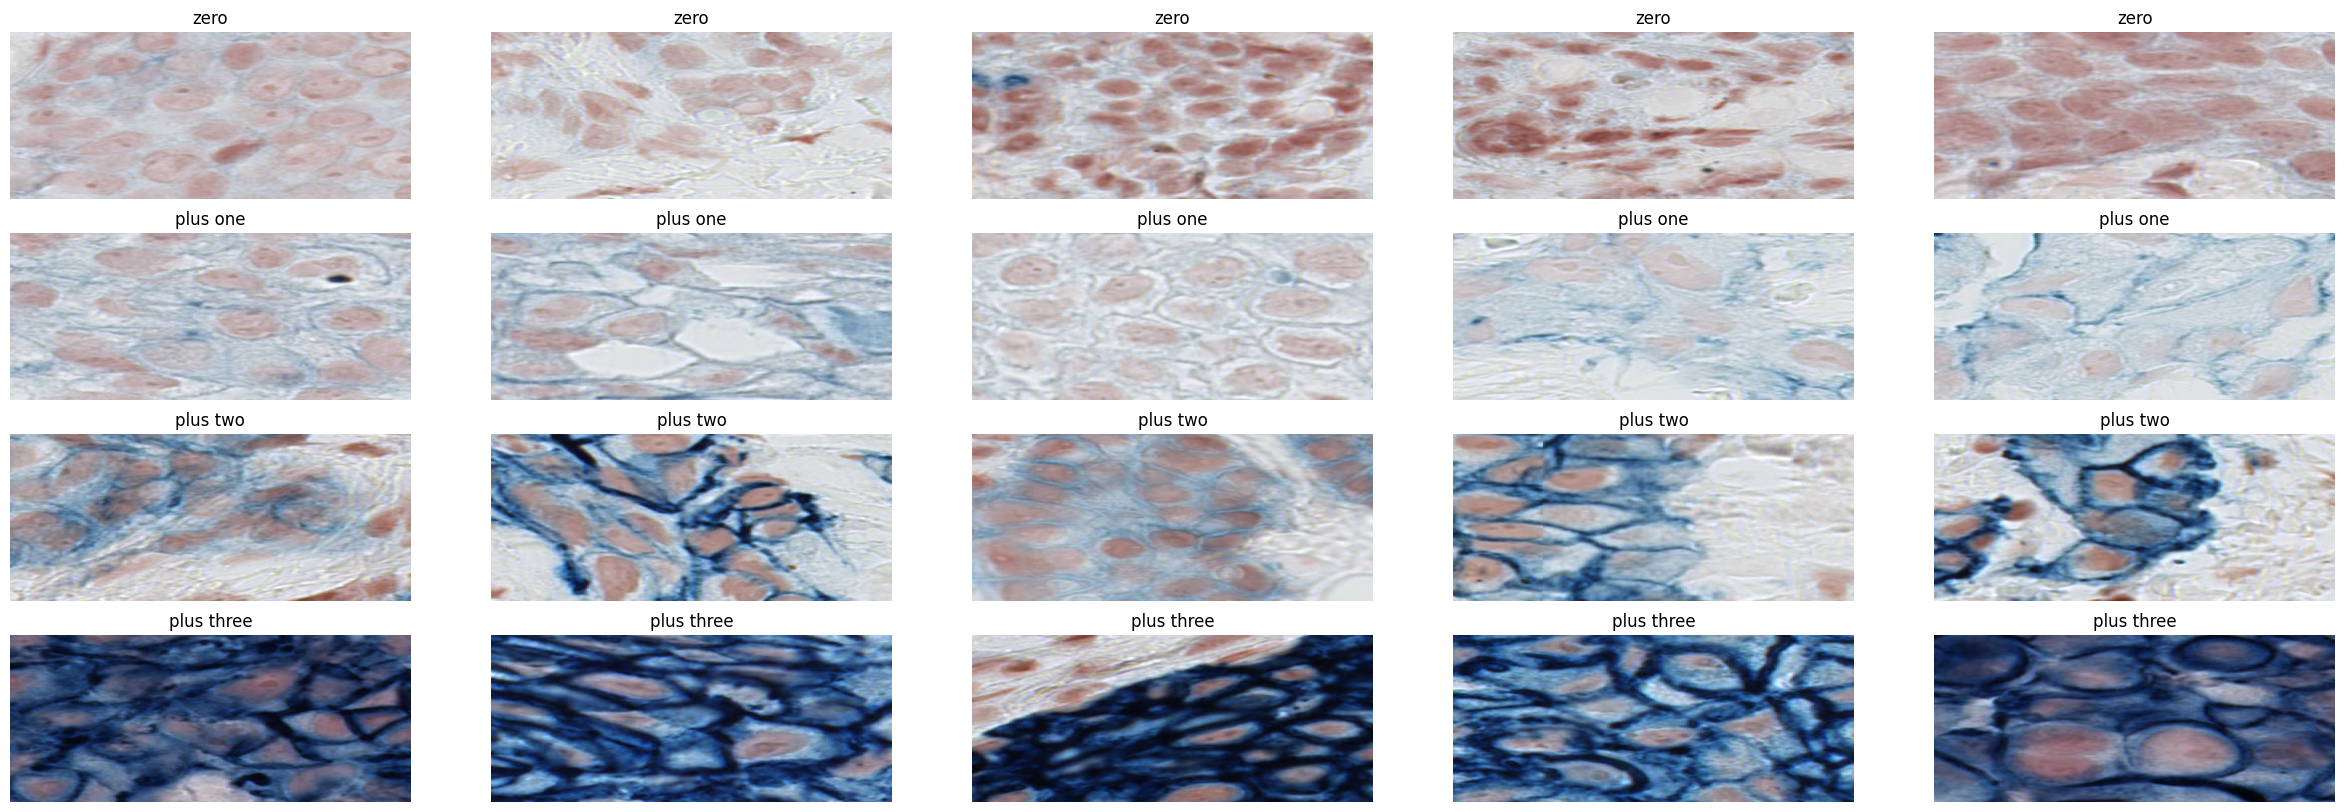

In [13]:
zero_samples = (data1[data1['label']==0]['image'].iloc[:5]).tolist()
plus_one_samples = (data1[data1['label']==1]['image'].iloc[:5]).tolist()
plus_two_samples = (data1[data1['label']==2]['image'].iloc[:5]).tolist()
plus_three_samples = (data1[data1['label']==3]['image'].iloc[:5]).tolist()

samples = zero_samples + plus_one_samples + plus_two_samples + plus_three_samples
del  zero_samples, plus_one_samples, plus_two_samples, plus_three_samples

f, ax = plt.subplots(4, 5, figsize=(30, 10))
for i in range(20):
    img = cv2.imread(samples[i])
    ax[i//5, i%5].imshow(img, cmap='gray')
    if i < 5:
        ax[i//5, i%5].set_title("zero")
    elif i >= 5 and i < 10:
        ax[i//5, i%5].set_title("plus one")
    elif i >= 10 and i < 15:
        ax[i//5, i%5].set_title("plus two")
    elif i >= 15 and i < 20:
        ax[i//5, i%5].set_title("plus three")
    ax[i//5, i%5].axis('off')
    ax[i//5, i%5].set_aspect('auto')
plt.show()

## Train Data:

label
2    150
3    150
1    147
0    146
Name: count, dtype: int64


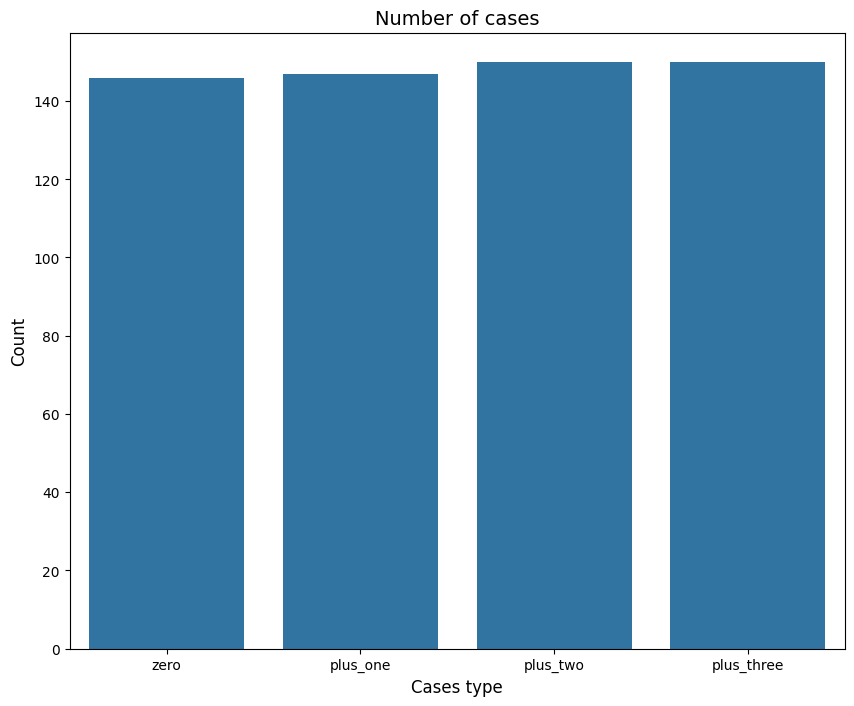

In [131]:
dirTrainPath = 'Train_4cls_amostra'

zero_dir = dirTrainPath + '/0/'
plus_one_dir = dirTrainPath + '/1/'
plus_two_dir = dirTrainPath + '/2/'
plus_three_dir = dirTrainPath + '/3/'


zero_class = glob.glob(zero_dir + '*.png')
plus_one_class = glob.glob(plus_one_dir + '*.png')
plus_two_class = glob.glob(plus_two_dir + '*.png')
plus_three_class = glob.glob(plus_three_dir + '*.png')

data1Train = []

for img in zero_class:
    data1Train.append((img, 0))
    
for img in plus_one_class:
    data1Train.append((img, 1))
    
for img in plus_two_class:
    data1Train.append((img, 2))
    
for img in plus_three_class:
    data1Train.append((img, 3))
    

data1Train2 = pd.DataFrame(data1Train, columns=['image', 'label'], index=None)

# Shuffle the data    
data1Train2 = data1Train2.sample(frac=1).reset_index(drop=True)


cases_count = data1Train2['label'].value_counts()
print(cases_count)


plt.figure(figsize=(10, 8))
sns.barplot(x=cases_count.index, y=cases_count.values)
plt.title('Number of cases', fontsize=14)
plt.xlabel('Cases type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(len(cases_count.index)), ['zero', 'plus_one', 'plus_two', 'plus_three'])
plt.show()

In [135]:
data1Train2['image'].to_list()

['Train_4cls_amostra/2\\32_HER2_25492.png',
 'Train_4cls_amostra/0\\46_HER2_32897.png',
 'Train_4cls_amostra/1\\24_HER2_7629.png',
 'Train_4cls_amostra/2\\26_HER2_19266.png',
 'Train_4cls_amostra/3\\06_HER2_14629.png',
 'Train_4cls_amostra/0\\57_HER2_12381.png',
 'Train_4cls_amostra/3\\06_HER2_14174.png',
 'Train_4cls_amostra/2\\04_HER2_19308.png',
 'Train_4cls_amostra/3\\11_HER2_14618.png',
 'Train_4cls_amostra/2\\32_HER2_19170.png',
 'Train_4cls_amostra/2\\25_HER2_15627.png',
 'Train_4cls_amostra/0\\46_HER2_62164.png',
 'Train_4cls_amostra/2\\32_HER2_19442.png',
 'Train_4cls_amostra/3\\06_HER2_13867.png',
 'Train_4cls_amostra/3\\09_HER2_12657.png',
 'Train_4cls_amostra/1\\29_HER2_17871.png',
 'Train_4cls_amostra/0\\57_HER2_4660.png',
 'Train_4cls_amostra/3\\11_HER2_17653.png',
 'Train_4cls_amostra/1\\14_HER2_7181.png',
 'Train_4cls_amostra/3\\19_HER2_17638.png',
 'Train_4cls_amostra/0\\57_HER2_13574.png',
 'Train_4cls_amostra/0\\18_HER2_26007.png',
 'Train_4cls_amostra/2\\26_HER2_196

In [143]:
def separar_pacientes(lista_imagens, proporcao_treino=0.8):
    """Separa os pacientes em conjuntos de treino e validação.

    Args:
        lista_imagens: Lista com os nomes das imagens.
        proporcao_treino: Proporção de pacientes que serão utilizados para treino.

    Returns:
        Tupla com duas listas: imagens de treino e imagens de validação.
    """

    # Cria um dicionário para agrupar as imagens por paciente
    pacientes = {}
    for imagem in lista_imagens:
        #print(imagem[0])
        paciente = int(imagem[0].split('_')[2][-2:])
        if paciente not in pacientes:
            pacientes[paciente] = []
        pacientes[paciente].append(imagem)

    # Embaralha a lista de pacientes
    lista_pacientes = list(pacientes.keys())
    random.shuffle(lista_pacientes)

    # Separa os pacientes em treino e validação
    num_treino = int(len(lista_pacientes) * proporcao_treino)
    pacientes_treino = lista_pacientes[:num_treino]
    pacientes_validacao = lista_pacientes[num_treino:]

    # Cria as listas finais de imagens
    imagens_treino = []
    imagens_validacao = []
    for paciente in pacientes_treino:
        imagens_treino.extend(pacientes[paciente])
    for paciente in pacientes_validacao:
        imagens_validacao.extend(pacientes[paciente])

    return imagens_treino, imagens_validacao


x_train, x_test = separar_pacientes(data1Train)

x_train

[('Train_4cls_amostra/0\\01_HER2_2775.png', 0),
 ('Train_4cls_amostra/0\\01_HER2_3372.png', 0),
 ('Train_4cls_amostra/0\\01_HER2_3570.png', 0),
 ('Train_4cls_amostra/0\\01_HER2_3973.png', 0),
 ('Train_4cls_amostra/0\\01_HER2_4153.png', 0),
 ('Train_4cls_amostra/0\\01_HER2_4163.png', 0),
 ('Train_4cls_amostra/0\\01_HER2_4350.png', 0),
 ('Train_4cls_amostra/0\\01_HER2_4565.png', 0),
 ('Train_4cls_amostra/0\\01_HER2_4761.png', 0),
 ('Train_4cls_amostra/0\\01_HER2_4962.png', 0),
 ('Train_4cls_amostra/0\\01_HER2_5144.png', 0),
 ('Train_4cls_amostra/0\\01_HER2_5180.png', 0),
 ('Train_4cls_amostra/0\\01_HER2_5353.png', 0),
 ('Train_4cls_amostra/0\\01_HER2_5357.png', 0),
 ('Train_4cls_amostra/0\\01_HER2_5751.png', 0),
 ('Train_4cls_amostra/0\\01_HER2_5752.png', 0),
 ('Train_4cls_amostra/0\\01_HER2_5769.png', 0),
 ('Train_4cls_amostra/0\\01_HER2_6163.png', 0),
 ('Train_4cls_amostra/0\\01_HER2_6435.png', 0),
 ('Train_4cls_amostra/0\\01_HER2_6436.png', 0),
 ('Train_4cls_amostra/0\\01_HER2_6530.pn

In [144]:
x_test

[('Train_4cls_amostra/0\\18_HER2_21645.png', 0),
 ('Train_4cls_amostra/0\\18_HER2_22017.png', 0),
 ('Train_4cls_amostra/0\\18_HER2_22018.png', 0),
 ('Train_4cls_amostra/0\\18_HER2_22090.png', 0),
 ('Train_4cls_amostra/0\\18_HER2_22843.png', 0),
 ('Train_4cls_amostra/0\\18_HER2_25188.png', 0),
 ('Train_4cls_amostra/0\\18_HER2_26007.png', 0),
 ('Train_4cls_amostra/0\\18_HER2_26137.png', 0),
 ('Train_4cls_amostra/0\\18_HER2_26321.png', 0),
 ('Train_4cls_amostra/0\\18_HER2_27618.png', 0),
 ('Train_4cls_amostra/0\\18_HER2_27999.png', 0),
 ('Train_4cls_amostra/0\\18_HER2_28054.png', 0),
 ('Train_4cls_amostra/0\\18_HER2_28423.png', 0),
 ('Train_4cls_amostra/0\\18_HER2_28609.png', 0),
 ('Train_4cls_amostra/0\\18_HER2_28610.png', 0),
 ('Train_4cls_amostra/0\\18_HER2_28615.png', 0),
 ('Train_4cls_amostra/0\\18_HER2_30660.png', 0),
 ('Train_4cls_amostra/0\\18_HER2_30785.png', 0),
 ('Train_4cls_amostra/0\\18_HER2_31793.png', 0),
 ('Train_4cls_amostra/0\\18_HER2_32080.png', 0),
 ('Train_4cls_amostr

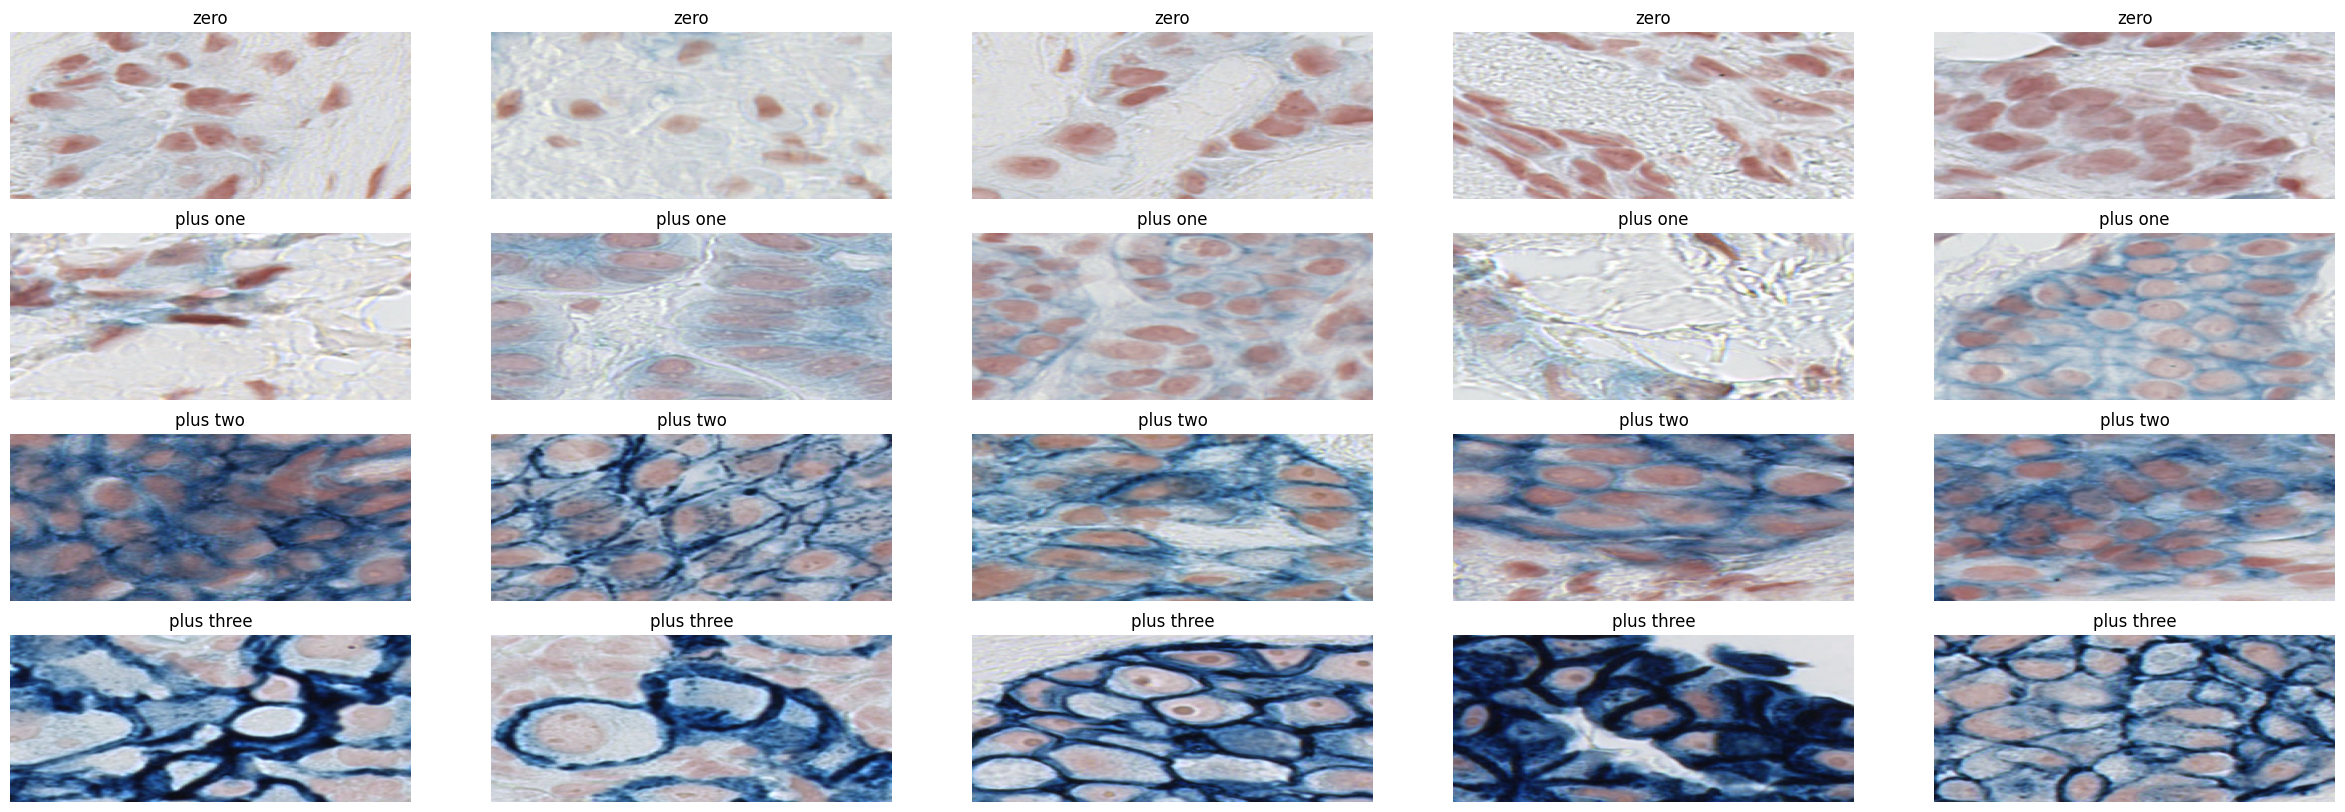

In [29]:
zero_samples = (data1Train[data1Train['label']==0]['image'].iloc[:5]).tolist()
plus_one_samples = (data1Train[data1Train['label']==1]['image'].iloc[:5]).tolist()
plus_two_samples = (data1Train[data1Train['label']==2]['image'].iloc[:5]).tolist()
plus_three_samples = (data1Train[data1Train['label']==3]['image'].iloc[:5]).tolist()

samples = zero_samples + plus_one_samples + plus_two_samples + plus_three_samples
del  zero_samples, plus_one_samples, plus_two_samples, plus_three_samples

f, ax = plt.subplots(4, 5, figsize=(30, 10))
for i in range(20):
    img = cv2.imread(samples[i])
    ax[i//5, i%5].imshow(img, cmap='gray')
    if i < 5:
        ax[i//5, i%5].set_title("zero")
    elif i >= 5 and i < 10:
        ax[i//5, i%5].set_title("plus one")
    elif i >= 10 and i < 15:
        ax[i//5, i%5].set_title("plus two")
    elif i >= 15 and i < 20:
        ax[i//5, i%5].set_title("plus three")
    ax[i//5, i%5].axis('off')
    ax[i//5, i%5].set_aspect('auto')
plt.show()

In [44]:
train_labels = os.listdir(dirTrainPath)
train_labels

['0', '1', '2', '3']

In [45]:
global_features = []
labels = []

In [46]:
def hu_moments(image):
    # Read image as grayscale image
    #im = cv2.imread(filename,cv2.IMREAD_GRAYSCALE)
    im = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Threshold image
    _,im = cv2.threshold(im, 128, 255, cv2.THRESH_OTSU)

    # Calculate Moments
    moments = cv2.moments(im)
    # Calculate Hu Moments
    huMoments = cv2.HuMoments(moments)
    return huMoments

In [47]:
for training_name in train_labels:
    dir = os.path.join(dirTrainPath, training_name)
    
    current_label = training_name
    
    for file in os.listdir(dir):
        file = dir + "/" + os.fsdecode(file)
        
        image = cv2.imread(file)
        
        if image is not None:
            huMoments = hu_moments(image)
            
        labels.append(current_label)
        global_features.append(huMoments)
    
    

In [80]:
g_labels = np.array(labels)

In [85]:
(trainData, testData, trainLabels, testLabels) = train_test_split(np.array(global_features), np.array(g_labels), test_size=0.2, random_state=9)

In [88]:
nsamples, nx, ny = trainData.shape
x_train = trainData.reshape((nsamples, nx*ny))

nsamples, nx, ny = testData.shape
x_test = testData.reshape((nsamples, nx*ny))

In [105]:
rfc = RandomForestClassifier()
rfc.fit(x_train, trainLabels)

y_pred = rfc.predict(x_test)

# accuracy score
acc = '{:.1%}'.format(accuracy_score(testLabels, y_pred))
print(f"Accuracy for Random Forrest: {acc}")

Accuracy for Random Forrest: 38.7%
